# Upload File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("USvideos_modified.csv", sep=",")
df.head(10)

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
0,2kyS6SvSYSE,2017-11-20,2017-11-13,17,22,CaseyNeistat,2564903,96321,7972,22149,...,False,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,7,2,2,1,9086142.0
1,1ZAPwfrtAFY,2017-11-20,2017-11-13,7,24,LastWeekTonight,6109402,151250,11508,19820,...,False,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",7,7,65,69,4,5937292.0
2,5qpjK5DgCt4,2017-11-20,2017-11-12,19,23,Rudy Mancuso,5315471,187303,7278,9990,...,True,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,7,8,68,426,23,4191209.0
3,puqaWrEC7tY,2017-11-20,2017-11-13,11,24,Good Mythical Morning,913268,16729,1386,2988,...,True,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,7,7,488,1246,28,13186408.0
4,d380meD0W0M,2017-11-19,2017-11-12,18,24,nigahiga,2819118,153395,2416,20573,...,True,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,6,7,488,1007,14,20563106.0
5,gHZ1Qz0KiKM,2017-11-20,2017-11-13,19,28,iJustine,1038365,22594,2798,3142,...,True,2 Weeks with iPhone X,ijustine|week with iPhone X|iphone x|apple|iph...,Thanks for watching! Don't forget to subscribe...,7,7,38,122,7,4652602.0
6,39idVpFF7NQ,2017-11-18,2017-11-12,5,24,Saturday Night Live,2688797,19042,3059,2689,...,True,Roy Moore & Jeff Sessions Cold Open - SNL,SNL|Saturday Night Live|SNL Season 43|Episode ...,Embattled Alabama Senate candidate Roy Moore (...,5,6,488,2216,42,5292034.0
7,nc99ccSXST0,2017-11-19,2017-11-12,21,28,CrazyRussianHacker,1251577,28951,1146,2606,...,True,5 Ice Cream Gadgets put to the Test,5 Ice Cream Gadgets|Ice Cream|Cream Sandwich M...,Ice Cream Pint Combination Lock - http://amzn....,6,7,113,180,13,10474796.0
8,jr9QtXwC9vc,2017-11-15,2017-11-13,14,1,20th Century Fox,2671756,12699,505,1010,...,True,The Greatest Showman | Official Trailer 2 [HD]...,Trailer|Hugh Jackman|Michelle Williams|Zac Efr...,"Inspired by the imagination of P.T. Barnum, Th...",2,2,151,458,28,2453494.0
9,TUmyygCMMGA,2017-11-15,2017-11-13,13,25,Vox,635985,20721,2417,4111,...,True,Why the rise of the robots won’t mean the end ...,vox.com|vox|explain|shift change|future of wor...,"For now, at least, we have better things to wo...",2,2,39,170,20,3808198.0


# General Clean up of Data

In [2]:
#filling in descriptions that were blank
df.description= df.description.fillna('No description provided')
df.tags= df.tags.fillna('')
df = df.dropna() #no information provided for subscribers to we eliminate those rows
df.shape

(4525, 23)

## Simple Regression Plots

Text(0.5, 1.0, 'Regression plot for views and likes')

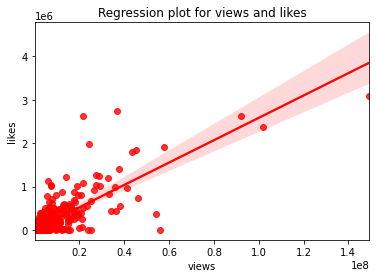

In [3]:
sns.regplot(data=df, x='views', y='likes', color='Red')
plt.title('Regression plot for views and likes')

Text(0.5, 1.0, 'Regression plot for views and dislikes')

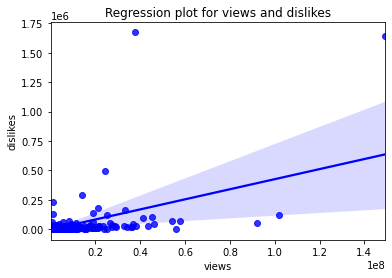

In [4]:
sns.regplot(data=df, x='views', y='dislikes', color= 'blue')
plt.title('Regression plot for views and dislikes')

## Correlation Table

In [5]:
df_corr = df[['likes', 'dislikes', 'comment_count', 'views']]
df_corr.corr()

,likes,dislikes,comment_count,views
likes,1.000000,0.460304,0.712906,0.820910
dislikes,0.460304,1.000000,0.833601,0.528963
comment_count,0.712906,0.833601,1.000000,0.573356
views,0.820910,0.528963,0.573356,1.000000


<AxesSubplot:>

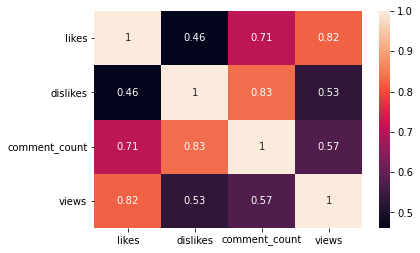

In [6]:
sns.heatmap(df_corr.corr(), annot= True)

## Confusion Matrix

In [7]:
df_cm = df_corr.corr().round(2)

#True Positive, True Negative, False Positive, False Negative Values for Confusion Matrix
likes_TP = df_cm.iloc[0]['likes']
likes_TN = (df_cm.sum().sum() - df_cm['likes'].sum() - df_cm.iloc[0].sum() + likes_TP).round(2)
likes_FP = df_cm['likes'].sum() - likes_TP
likes_FN = df_cm.iloc[0].sum() - likes_TP

dislikes_TP = df_cm.iloc[1]['dislikes']
dislikes_TN = (df_cm.sum().sum() - df_cm['dislikes'].sum() - df_cm.iloc[1].sum() + dislikes_TP).round(2)
dislikes_FP = df_cm['dislikes'].sum() - dislikes_TP
dislikes_FN = df_cm.iloc[1].sum() - dislikes_TP

comment_count_TP = df_cm.iloc[2]['comment_count']
comment_count_TN = (df_cm.sum().sum() - df_cm['comment_count'].sum() - df_cm.iloc[2].sum() + comment_count_TP).round(2)
comment_count_FP = df_cm['comment_count'].sum() - comment_count_TP
comment_count_FN = df_cm.iloc[2].sum() - comment_count_TP

views_TP = df_cm.iloc[3]['views']
views_TN = (df_cm.sum().sum() - df_cm['views'].sum() - df_cm.iloc[3].sum() + views_TP).round(2)
views_FP = df_cm['views'].sum() - views_TP
views_FN = df_cm.iloc[3].sum() - views_TP

In [8]:
#Data frame to display values for the purpose of checking math, will delete when evaluation metrics are decided and computed
cm_values = pd.DataFrame({'TP':[likes_TP,dislikes_TP,comment_count_TP, views_TP], 
                          'TN':[likes_TN,dislikes_TN,comment_count_TN, views_TN],
                          'FP':[likes_FP,dislikes_FP,comment_count_FP, views_FP],
                          'FN':[likes_FN,dislikes_FN,comment_count_FN, views_FN]})
cm_values.index = ['likes','dislikes','comment_count','views']
cm_values

,TP,TN,FP,FN
likes,1.0,6.86,1.99,1.99
dislikes,1.0,7.20,1.82,1.82
comment_count,1.0,6.62,2.11,2.11
views,1.0,7.00,1.92,1.92


# Sentiment Analysis Using Wordcloud

In [9]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Tags

(-0.5, 1999.5, 999.5, -0.5)

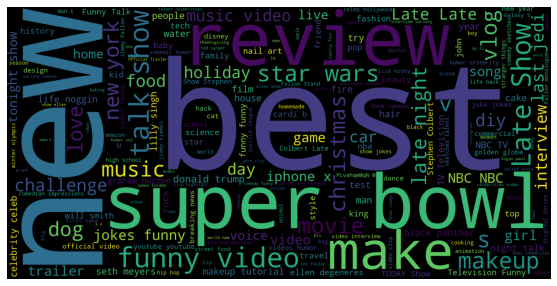

In [10]:
tags_complete=''.join(df.tags)
import re
tags= re.sub('[^a-zA-Z]', ' ', tags_complete)

tags= re.sub(' +', ' ', tags)

from wordcloud import WordCloud, STOPWORDS
wordcloud= WordCloud(width= 2000, height= 1000, stopwords= set(STOPWORDS)).generate(tags)
#Visualize
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

### Title

(-0.5, 1999.5, 999.5, -0.5)

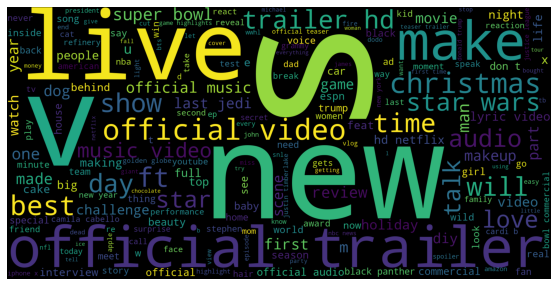

In [11]:
df.title.head(10)
title_complete=' '.join(df.title.str.lower())
title= re.sub('[^a-zA-Z]', ' ', title_complete)
title= re.sub(' +', ' ', title)
wordcloud_title= WordCloud(width= 2000, height= 1000, stopwords= set(STOPWORDS)).generate(title)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud_title)
plt.axis('off')

In [15]:
##COUNTER OF HOW MANY OF A CERTAIN WORD
counter=0 
for x in df.title.str.lower():
    #print(x.split()) #be warned removing the initial pound sign will result in over 4000 values being printed 
    if "new" in x.split():
        counter= counter+1
        #print("--------------------FOUND--------------") #this will show 81
#print((df.title).shape)
counter

117

### Descriptions

Notes: for this word cloud is that it just looks terrible. Like completely horrid and that is due to the fact of the composition of the description. A lot of the descriptions included emojis, hyperlinks, etc. So the general clean up, organization and eventual wordcloud represents that mess.

(-0.5, 1999.5, 999.5, -0.5)

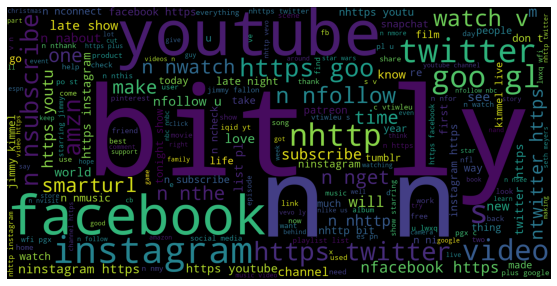

In [13]:
df.description.head(10)
dscrpt_complete=' '.join(df.description.str.lower())
dscrpt= re.sub('[^a-zA-Z]', ' ', dscrpt_complete)
dscrpt= re.sub(' +', ' ', dscrpt)
wordcloud_dscrpt= WordCloud(width= 2000, height= 1000, stopwords= set(STOPWORDS)).generate(dscrpt)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud_dscrpt)
plt.axis('off')